<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/31/SIA/TDm/TD_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning : Tutorial

Welcome to this Tutorial.
This might be your first time in Deep Learning. Don't worry, we will guide you.

This tutorial will introduce you to various models:

<img src="https://i.imgflip.com/6u9pe5.jpg" title="Oui Oui " height=480>





The goal of this tutorial : 

*   Direct application of DL Course
*   Understand the differences between differents networks
*   Use Pytorch to create and train a Neural Network
*   Learn the Basic Workflow of a Deep Learning engineer.
*   Introducing you to some of the useful DL Frameworks

**Question are shown using bold characters**


Don't forget to activate your GPU by going to : 
Exécution -> Modifier le type d'éxecution -> GPU

In [ ]:
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

import os
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import random
import torch.optim as optim
from tqdm import tqdm

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 9.5 MB/s 


# A Simple Neuron

Let's introduce a Simple Task. 
Given a boolean value (0 or 1), we want the model to invert the input value. 
Example : if the model's input is 0, we want it to output 1.

In order to perform this taks, we will need few elements:
* a Dataset
* a Model
* a Training/Testing Loop
* Some hyperparameters

## a - The Simple Dataset and Dataloader

As you know, to train a model you will need data. In practice before choosing/creating a model, we usually have a look on the Dataset. These datas come in the form of labeled or unlabeled data. In Pytorch, datasets inherits from the Dataset class. It is a simple class composed of minimum 3 methods :
* __init__ : to initialize the class
* __getitem__ : to retrieve a sample according to a index number
* __len__ : to return the len of the entire Dataset

In our case, we will generate a list of 0 and 1. The __getitem__ method should return the opposite value of the element picked at the given index.

In [ ]:
class SimpleDataset(Dataset):

  def __init__(self, len_data):

    self.len_data = len_data
    self.data = [random.randint(0,1) for i in range(len_data)]

  def __getitem__(self,idx):
    # TODO : Return a dictionnary {'data': .., 'label':}
    # TODO : What is the value of the Label ?
    data = self.data[idx]
    label = 1 if self.data[idx]== 0 else 0
    return {"data":torch.as_tensor(self.data[idx]), 
            "label": torch.as_tensor(label)}

  def __len__(self):
    # Explanation : We know that the total length of the dataset is the length of the self.data attribute
    return len(self.data)

# TODO : Create dataset_train and dataset_test

len_dataset_train = len_dataset_test= 100000 
dataset_train = SimpleDataset(len_dataset_train )
dataset_test = SimpleDataset(len_dataset_test)


The Dataloader is used to fetch batches of data to send them at the same time to the GPU. A DataLoader need a batch size.

In [ ]:
dataset_train = DataLoader(dataset_train, batch_size= 2048)
dataset_test = DataLoader(dataset_test, batch_size= 2048)

## b - The Simple Model

First time coding a neural net ? Let's think a little bit.
Question : 
* What kind of task is it ?
* Is one neuron enough to perform the inversion of a boolean ? 
* How do we modelize a Single Neuron ?

Creating a Model in PyTorch is pretty simple. We initalize a Class that inherits from nn.Module. 

It is defined as follows:


```
class Model(nn.Module):
  def __init__(self,...):
    """"
    Defines the model. You can put the input size as a parameter if needed..
    """"
    super().__init__() #to init the main class
    self.layers = ... # defining the model : could be Conv2d, Linear, RNN, LSTM


  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    output = self.layers(x)
    return output
```

More informations : https://pytorch.org/docs/stable/nn.html



In [ ]:
class SimpleModel(nn.Module):
    def __init__(self,):
      super().__init__()
      # Note : We initialize randomly the valuees of the weights and the biases as these are learned through the training
      self.w = nn.Parameter(torch.tensor(random.random()), requires_grad =True) # Weight
      self.b = nn.Parameter(torch.tensor(random.random()), requires_grad =True) # Bias
      self.sigmoid = nn.Sigmoid()

    def forward(self,x):
      # TODO : Using the famous formula of a single neuron, compute the value of x1 : the output of the neuron
      x1 = x*self.w+self.b
      # TODO : Pass x1 through the activation layer
      x1 = self.sigmoid(x1)
      return x1

In [ ]:
# TODO : Create an instance of the SimpleModel and print the layers it has using print()
model = SimpleModel()
print(model)

SimpleModel(
  (sigmoid): Sigmoid()
)


## c- The Simple Training

As of now, we are supposed to have the model and the dataset. Hence, we need to create the training loop and initialize some useful object for the training.


The training loop is defined as follows :


```
for epoch in num_epoch : 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):        
        data = data.to(device)
        optimizer.zero_grad()
        outputs = net(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i == ??:
          running_loss= running_loss/??



As you can see, there are some obscure words that we didn't define yet.

### i - Optimizer

Optimizers are algorithms or methods used to minimize an error function (loss function) or to maximize the efficiency of production. A learnign rate must be defined

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

### ii - Criterion 

This is basically the loss function. It measures the differences between the output and the input. We want to minimize it.

In [ ]:
# TODO : Initialize a criterion. Choose between BCELoss or MSELoss. More Information in https://pytorch.org/docs/stable/nn.html#loss-functions
criterion = 

### iii - Num Epoch 

The number of epoch corresponds to the number of time, the model will see the samples from the dataset

In [ ]:
# TODO : Choose a number of epochs 
num_epochs = 

### iv - Device 

Once the model initialized, we prefer accelerating the training. Hence, we send it to the GPU. To send it you have to define a device as follows:

```
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
```
To send your model or data to device : 



```
model = model.to(device) or data = data.to(device)
```




In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### v - Gathering everything under a Loop

Let's gather everything under a Training loop and a Testing loop.
The training loop will update the weights of the model, while the testing loop will only test the model without updating anything.


In [ ]:
# Defining the Training Loop :
# Define Device :
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO : Create an Instance of the Model
model = SimpleModel().to(device)

# TODO : Define your device : 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# TODO : Define your optimizer :
lr = 1e-1
optimizer = optim.SGD(model.parameters(), lr=lr)

# TODO : Define your criterion :
criterion = nn.BCELoss()

# TODO : Define your number of epochs :
n_epoch = 50

# Initializing some stuff for visualization
loss_train, loss_test = [], []


for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataset_train, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data['data'].to(device), data['label'].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # TODO : Send the input through the model
        outputs = model(inputs)

        # TODO : Compute the loss between the ouputs and the targets
        loss = criterion(outputs, labels.float())

        # update the weights using backward and optimizer
        loss.backward()
        optimizer.step()
        # print(model.w, model.b)
        # print statistics
        running_loss += loss.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss train: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_train.append(running_loss/i)
    # Explanation : We don't need gradients here as we are not updating anything. This we call torch.no_grad()
    with torch.no_grad():
      for i, data in enumerate(dataset_test, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data['data'].to(device), data['label']


        # TODO : Send the input through the model
        outputs = model(inputs)

        # print(model.w, model.b)
        # print statistics
        running_loss += loss.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss test: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_test.append(running_loss/i)

print('Finished Training')

### vi - Let's visualize some stuff

As you could see we have to lists where we logged loss values each epochs. Let's plot them to see if the model is overfitting/underfitting.
* What can you tell on your model's training ?

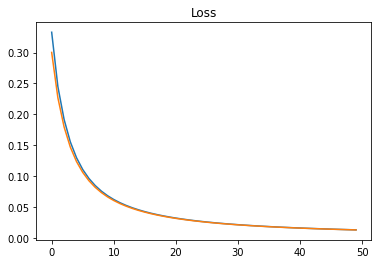

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(loss_train)
plt.plot(loss_test)

# Linear Layers

One Neuron can perfom a lot of easy task. However, it is quickly limited when it comes to complex tasks.

* Can a Single Neuron perform a XOR calculation ? Can you prove it ? How many neurons do we need at minimum to perform XOR ?



The simple answer is no. We can obviously recreate a Model with lots of parameters but why bother when Engineer's wrote the Linear Layer to help us.

The Linear Layer is composed of 1 or more neurons. Hence, we can learn more complex representation of the data.


<img src="https://docs.nvidia.com/deeplearning/performance/dl-performance-fully-connected/graphics/fc-layer.svg">




## Some Downloads 

These are some downloads. Don't bother understanding it.

In [ ]:
!pip install gdown
!gdown --id 1OGlSEVyhm06uJ-yusufl8A7poAHzuose
!gdown --id 1CNVhbhDMCvGIYdyUv_H5kSsTflEzyI-s
!unzip /content/test1.zip
!unzip /content/train.zip
# https://drive.google.com/file/d/1CNVhbhDMCvGIYdyUv_H5kSsTflEzyI-s/view?usp=sharing
# https://drive.google.com/file/d/1OGlSEVyhm06uJ-yusufl8A7poAHzuose/view?usp=sharing

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflatin

## a - Another Dataset 

Let's introduce an Intermediate Task. Given images of dogs and cats, we want the model to classify if the input image is an image of a dog or a cat. We will use this task for the rest of the tutorial.

#### Data Exploration

Let's have a look on the Dataset. 
* Using Matplotlib.Pyplot plot some images of the folder 
* Are the sizes of the images the same ? If no, what issue could occur for the training regarding the Model ?

In [ ]:
import os

# Loading the files from the folder
def return_files(path):
  return [path + i for i in os.listdir(path)]

path_train = '/content/train/'
path_test ='/content/test1/'
train_images = return_files(path_train)
test_images = return_files(path_test)
print(train_images)

['/content/train/cat.380.jpg', '/content/train/cat.1898.jpg', '/content/train/dog.2330.jpg', '/content/train/dog.7398.jpg', '/content/train/dog.12015.jpg', '/content/train/cat.2508.jpg', '/content/train/cat.524.jpg', '/content/train/dog.7222.jpg', '/content/train/dog.1185.jpg', '/content/train/dog.4154.jpg', '/content/train/dog.6222.jpg', '/content/train/dog.4183.jpg', '/content/train/dog.4533.jpg', '/content/train/cat.3455.jpg', '/content/train/cat.6795.jpg', '/content/train/dog.7110.jpg', '/content/train/cat.2984.jpg', '/content/train/dog.1479.jpg', '/content/train/cat.11488.jpg', '/content/train/cat.5826.jpg', '/content/train/cat.5932.jpg', '/content/train/cat.3963.jpg', '/content/train/cat.6088.jpg', '/content/train/cat.10193.jpg', '/content/train/cat.8015.jpg', '/content/train/cat.8556.jpg', '/content/train/cat.2088.jpg', '/content/train/dog.3324.jpg', '/content/train/dog.11757.jpg', '/content/train/cat.11693.jpg', '/content/train/dog.10317.jpg', '/content/train/cat.4205.jpg', '/c

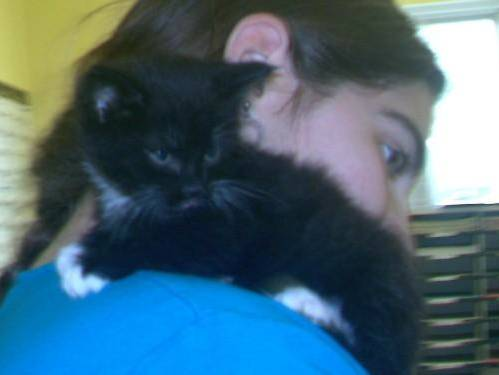

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
im = cv2.imread(train_images[1])
cv2_imshow(im)

### Transformations

One issue could appear when training a Model on images of differents sizes : each image of the dataset could have a different size. But how would the Linear Layer handle that ?
In fact, the linear layer can't handle that. We have to provide a fixed size input for the layer. It is where torchvision comes as a handy tool. It proposed some Transformations on the input data, such as Normalization, Resizing, Blurring...

Other Tools : Albumentations, Kornia..


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((128,128)),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
import os
import cv2
class IntermediateDataset(Dataset):

  def __init__(self,list_images, transforms = None):
    self.list_images = list_images
    self.transforms = transforms

  def __getitem__(self,idx):
    # Returns a piece of data that corresponds to element idx.
    image = self.list_images[idx]
    label = image.split('.')[0]
    label = 1 if label =='dog' else 0
    image = cv2.imread(image)
    # print(image, label)
    if self.transforms:
      image = self.transforms(image)
    return {'data':image, 'label':torch.as_tensor(label)}
    
  def __len__(self):
    # Returns the len of the entire Dataset
    return len(self.list_images)

We obviously have 2 datasets : the training and the testing dataset. In other scenarios we will also have a validation dataset.

*   The training dataset is used to train the model
*   The testing datasetg is used to test the model




In [ ]:
dataset_train = IntermediateDataset(train_images, transform)
dataset_test = IntermediateDataset(test_images, transform)

# print(dataset[0])
dataset_train = DataLoader(dataset_train, batch_size = 100)
dataset_test = DataLoader(dataset_test, batch_size = 20)

## The Intermediate Model

The intermediate model will consist of one Linear Layer.
However, we need to parametrize the input value of the Linear Layer to make is usable for futur works.

In [ ]:
class IntermediateModel(nn.Module):

  def __init__(self, input_size):
    super().__init__()
    # Define your model here
    self.layer = nn.Linear(input_size,1)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    # Define how your data passes the model
    output = self.layer(x)
    output = self.sigmoid(output)
    return output

## Creating a Training Loop

As usual, create the training loop. What changes from the previous training ?
In order to compute the accuracy of the model on the testing set, we will use torchmetrics.


In [ ]:
from torchmetrics import Accuracy

# Defining the Training Loop :
# Define Device :
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO : Create an Instance of the Model
input_size = 128*128*3
model = IntermediateModel(input_size).to(device)

# TODO : Define your device : 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# TODO : Define your optimizer :
lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr=lr)

# TODO : Define your criterion :
criterion = nn.BCELoss()

# TODO : Define your Accuracy
accuracy = Accuracy(threshold = 0.5).to(device)

# TODO : Define your number of epochs :
n_epoch = 2

# Initializing some stuff for visualization
loss_train, loss_test = [], []


for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(dataset_train, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data['data'].to(device), data['label'].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # TODO : Manipulate the input Data so that its shape is BS,Input Size
        inputs = inputs.reshape(inputs.shape[0],-1)

        # TODO : Send the input through the model
        outputs = model(inputs)
        # print(outputs.shape)

        # TODO : Compute the loss between the ouputs and the targets
        loss = criterion(outputs.squeeze(-1), labels.float())
        acc = accuracy(outputs.flatten(), labels)

        # update the weights using backward and optimizer
        loss.backward()
        optimizer.step()
        # print(model.w, model.b)
        # print statistics
        running_loss += loss.item()
        running_acc += acc.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss train: {running_loss / 100:.3f} acc train: {running_acc /100:.3f}')
            running_loss = 0.0
            running_acc = 0.0

    loss_train.append(running_loss/i)
    # Explanation : We don't need gradients here as we are not updating anything. This we call torch.no_grad()
    with torch.no_grad():
      for i, data in enumerate(dataset_test, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data['data'].to(device), data['label'].to(device)

        inputs = inputs.reshape(inputs.shape[0],-1)

        # TODO : Send the input through the model
        outputs = model(inputs)
        # print(outputs)
        acc = accuracy(outputs.flatten(), labels)
        # print(model.w, model.b)
        # print statistics
        running_loss += loss.item()
        running_acc += acc.item()

        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss test: {running_loss / 100:.3f} acc test: {running_acc / 100:.3f}')
            running_loss = 0.0
            running_acc = 0.0

    loss_test.append(running_loss/i)

print('Finished Training')

[1,    20] loss train: 0.094 acc train: 0.157
[1,   120] loss train: 0.294 acc train: 0.892
[1,   220] loss train: 0.268 acc train: 0.904
[1,    20] loss test: 0.119 acc vall: 0.450
[1,   120] loss test: 0.216 acc vall: 0.904
[1,   220] loss test: 0.216 acc vall: 0.917
[1,   320] loss test: 0.216 acc vall: 0.909
[1,   420] loss test: 0.216 acc vall: 0.906
[1,   520] loss test: 0.216 acc vall: 0.905
[1,   620] loss test: 0.216 acc vall: 0.894
[2,    20] loss train: 0.051 acc train: 0.180
[2,   120] loss train: 0.237 acc train: 0.915
[2,   220] loss train: 0.237 acc train: 0.917
[2,    20] loss test: 0.106 acc vall: 0.458
[2,   120] loss test: 0.190 acc vall: 0.909
[2,   220] loss test: 0.190 acc vall: 0.925
[2,   320] loss test: 0.190 acc vall: 0.919
[2,   420] loss test: 0.190 acc vall: 0.912
[2,   520] loss test: 0.190 acc vall: 0.910
[2,   620] loss test: 0.190 acc vall: 0.903
Finished Training


## Saving The Model

Once your model trained, keeping the weights would be a good idea. In order to save the weights of your model, you have to specify a Path and call torch.save

In [ ]:
PATH = _
torch.save(net.state_dict(), PATH)

## Testing

Let's test the model on few data:


In [ ]:
dataiter = iter(dataloader_test)
images, labels = dataiter.next()
classes = ( 'cat', 'dog')
# Plot Images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

                  # Load the Net 
                  # Load model into Net 
                  # Send images through the Net 
                  # Check the Predicted Class




print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In fact, before deploying a model, we should compute some metrics on it.

Calculate the accuracy of the model. Calculate the accuracy per class.

Pseudocode:
```
With no grad:
  for each data in test data:
    predict from model
    check if prediction is accurate
  calculate accuracy 
```

In [ ]:
correct = 0
total = 0

# Do we update the weights ? If no, add the necessary line
with _ :
    for data in dataloader_test:
        images, labels = data
        # forward the data


        # calculate the total of samples
        
        # calculate the total of samples that are correctly predicted
        

print('Accuracy of the network on test images: %d %%' % (100 * correct / total))

# We are going to count the accuracy for each labels.
# Initialize a dict where each class is at 0 
# e.g : {'plane': 0, 'car': 0, 'bird': 0, 'cat': 0, 'deer': 0, 'dog': 0, 'frog': 0, 'horse': 0, 'ship': 0, 'truck': 0}
# Plus point if you use Pythonic way of coding (dictionnary comprehension)

correct_pred = 
total_pred = 

with torch.no_grad():
    for data in dataloader_test:
        images, labels = data
       
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            # for each label that are correct, add  1 to its corresponding place in the dict
            

## Going Further

As you can see, a lot of code is just some copy paste. Usually, we create a  **Trainer** class to handle the Training. 
The Trainer usually has :
* a Training method
* a Testing method

A Trainer allows modularity during training as the model, the data are just attributes of the Trainer.
We provide you the code for a really simple Trainer. Have a look at it.


In [ ]:
class Trainer():

  def __init__(self, model, dataset_train, dataset_test, criterion, optimizer, device = 'cuda'):

    self.model = model.to(device)
    self.dataset_train = dataset_train
    self.dataset_test = dataset_test
    self.criterion = criterion
    self.optimizer = optimizer
    self.device = device

  def forward(self,x):
    x = x.reshape(x.shape[0],-1)
    x = self.model(x)
    return x 

  def train(self):
    
      running_loss = 0.0
      running_acc = 0.0
      for i, data in enumerate(tqdm(self.dataset_train), 0):
          inputs, labels = data['data'].to(device), data['label'].to(device)
          self.optimizer.zero_grad()
          outputs = self.forward(inputs)
          loss = self.criterion(outputs.squeeze(-1), labels.float())
          loss.backward()
          self.optimizer.step()          
          running_loss += loss.item()
          running_acc += acc.item()
          if i % 100 == 19:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss train: {running_loss / 100:.3f} acc train: {running_acc /100:.3f}')
              running_loss = 0.0
              running_acc = 0.0
  @torch.no_grad()
  def test(self):
      running_acc = 0.0
      for i, data in enumerate(tqdm(self.dataset_test), 0):
        inputs, labels = data['data'].to(device), data['label'].to(device)
        outputs = self.forward(inputs)
        running_acc += acc.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}]acc test: {running_acc / 100:.3f}')
            running_acc = 0.0

  def train_test(self, num_epoch):
      for epoch in range(num_epoch):
        print("Train")

        self.train()
        print("Test")
        self.test()



Using the Trainer:
* Change the model for a 2 layered Model. 
(Linear(input_shape, 512)->Linear( 512,1) for example). Don't forget to add some activation layers (ReLU, GeLU,TanH..). 
* What does it change to the accuracy of the model ? 

In [ ]:
class IntermediateModel(nn.Module):

  def __init__(self, input_size):
    super().__init__()
    # Define your model here
    self.layer = nn.Linear(input_size,512)
    self.layer2 = nn.Linear(512,1)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()
  def forward(self,x):
    # Define how your data passes the model
    output = self.layer(x)
    output = self.relu(output)
    output = self.layer2(output)
    output = self.sigmoid(output)
    return output

In [ ]:
trainer = Trainer( model =IntermediateModel(input_size),
                  dataset_train = dataset_train, 
                  dataset_test =dataset_test, 
                  criterion= nn.BCELoss(), 
                  optimizer = optim.SGD(model.parameters(), lr=1e-1), 
                  device = 'cuda')

In [ ]:
trainer.train_test(1)

Train


  8%|▊         | 20/250 [00:06<01:16,  3.01it/s]

[2,    20] loss train: 0.136 acc train: 0.170


 48%|████▊     | 120/250 [00:44<00:55,  2.36it/s]

[2,   120] loss train: 0.681 acc train: 0.850


 88%|████████▊ | 220/250 [01:25<00:12,  2.36it/s]

[2,   220] loss train: 0.681 acc train: 0.850


100%|██████████| 250/250 [01:36<00:00,  2.60it/s]


Test


  4%|▎         | 22/625 [00:01<00:40, 14.95it/s]

[2,    20]acc test: 0.170


 20%|█▉        | 122/625 [00:08<00:36, 13.76it/s]

[2,   120]acc test: 0.850


 36%|███▌      | 222/625 [00:15<00:28, 14.00it/s]

[2,   220]acc test: 0.850


 52%|█████▏    | 322/625 [00:22<00:20, 14.49it/s]

[2,   320]acc test: 0.850


 68%|██████▊   | 422/625 [00:29<00:14, 14.47it/s]

[2,   420]acc test: 0.850


 84%|████████▎ | 522/625 [00:36<00:08, 11.93it/s]

[2,   520]acc test: 0.850


100%|█████████▉| 622/625 [00:45<00:00, 13.80it/s]

[2,   620]acc test: 0.850


100%|██████████| 625/625 [00:45<00:00, 13.82it/s]


## Conclusion on the Linear Layers

* How did the Linear Model perfom on this dataset ?
* Is it useful to deepen (add layers) the model ?
* 

# Convolutional Neural Networks : CNN

Convolutional neural networks are a specialized type of artificial neural networks that use a mathematical operation called convolution in place of general matrix multiplication in at least one of their layers. They are really useful in Vision Task.

Before beginning let's understand how convolution work:
https://ezyang.github.io/convolution-visualizer/
* What is the impact of the Kernel Size parameter on the output Tensor ?
* What is the impact of the Stride parameter on the output Tensor ?


## Intermediate Dataset Part 2 

Do we need to change something on the Dataset ?

## Intermediate Model Part 2 

Now we will use a convolutional layer to process the input image. The CNN model is composed of a Feature Extractor and a Classification Head.
As a Feature Extractor, we will use a single Conv2D layer.
As a Classification Head, we will use a single Linear Layer.

In [ ]:
class IntermediateModel2(nn.Module):
  def __init__(self, input_channel):
    self.feature_extra = nn.Conv2D(input_channel,64, 3)

In [ ]:
class ConvTrainer(Trainer):

  def __init__(self, model, dataset_train, dataset_test, criterion, optimizer, device = 'cuda'):
      super().__init__( model, dataset_train, dataset_test, criterion, optimizer, device )

  def forward(self,x):
    x = self.model(x)
    return x

## Visualize the filters

Now that the modelis trained, what does it see ?
Let's visualize the filters.

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt
    from torchvision import utils

    def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))


    if __name__ == "__main__":
        layer = 1
        filter = model.features[layer].weight.data.clone()
        visTensor(filter, ch=0, allkernels=False)

        plt.axis('off')
        plt.ioff()
        plt.show()

# Visual Transformers

Now let's talk real stuff. Transformers. So transformers are cars that transforms into gigantic robots.. Wrong subject sorry.


Transformers models are big encoder/decoder models builts around the concept of attention mecanism. Transformer models were first used for NLP Tasks. However, they are now used for Vision Tasks. In this part of the tutorial, we will be "training" a Vision Transformer Model for Classification. In fact, we won't be able to train the model from scratch as it will take about 72h on 8 GPUs to train. Here, we will fine-tune a model thanks to HuggingFace libraries.



## About Vision Transformer 

Vision Transformer model is the equivalent of BERT Model for Vision Task. BERT takes a sequence of tokenized sentence as input (a Word is converted to a Numerical Token using a dictionnary). As an extension, The ViT model takes a sequence of Image Patches of size 16x16 as Input. Each image Patch is a Token.
Each Patches are projected through a Linear Layer. 
A [Class] Token is added. It is a learnable token. Intuitively, the [Class] Token will capture all the class information from the other tokens and be used as the image representation. 
Positional Embedding are also added. These are learned embeddings used to retains positional informations. 

<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2021-01-26_at_9.43.31_PM_uI4jjMq.png">

So we need to make few modifications on what we did previously.

In [ ]:
!pip install datasets transformers

In [ ]:
from transformers import ViTModel, ViTConfig

configuration = ViTConfig()
model = ViTModel(configuration)
configuration = model.config

In [ ]:
model

In [ ]:
from transformers import ViTFeatureExtractor
model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]